In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Disable all alerts
warnings.filterwarnings("ignore")

In [2]:
# Read dataset
df = pd.read_csv('fast_food.csv')
df.head()

,Unnamed: 0,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,restaurant,item
0,0,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Mcdonalds,Artisan Grilled Chicken Sandwich
1,1,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Mcdonalds,Single Bacon Smokehouse Burger
2,2,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Mcdonalds,Double Bacon Smokehouse Burger
3,3,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich
4,4,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich


In [3]:
# To see data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   515 non-null    int64  
 1   calories     515 non-null    int64  
 2   cal_fat      515 non-null    int64  
 3   total_fat    515 non-null    int64  
 4   sat_fat      515 non-null    float64
 5   trans_fat    515 non-null    float64
 6   cholesterol  515 non-null    int64  
 7   sodium       515 non-null    int64  
 8   total_carb   515 non-null    int64  
 9   fiber        515 non-null    float64
 10  sugar        515 non-null    int64  
 11  protein      515 non-null    float64
 12  vit_a        515 non-null    float64
 13  vit_c        515 non-null    float64
 14  calcium      515 non-null    float64
 15  restaurant   515 non-null    object 
 16  item         515 non-null    object 
dtypes: float64(7), int64(8), object(2)
memory usage: 68.5+ KB


# Feature Engineering

In [4]:
dff = df.copy() # create duplicate for df

# create new column using oop to classify micronutrient into several classes
def micro_nutrient(row):
    if row['vit_a'] >= 50 or row['vit_a'] <= 25:
        return "High Vitamin A" 
    elif row['vit_c'] >= 30 or row['vit_c'] <= 15:
        return "High Vitamin C"
    else:
        return "Low Nutrition"

dff['micro_nutrient'] = dff.apply(micro_nutrient, axis=1)
dff.head()

,Unnamed: 0,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,restaurant,item,micro_nutrient
0,0,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Mcdonalds,Artisan Grilled Chicken Sandwich,High Vitamin A
1,1,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Mcdonalds,Single Bacon Smokehouse Burger,High Vitamin A
2,2,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Mcdonalds,Double Bacon Smokehouse Burger,High Vitamin A
3,3,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,High Vitamin A
4,4,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,High Vitamin A


In [5]:
# create new column using oop  to classify macronutrients into several classes
def macro_nutrient(row):
    if row['calories'] <= 400 and row['protein'] >= 25 and row['fiber'] <= 3:
        return "Low Calories - High Protein - Low Fiber" 
    elif row['calories'] <= 400 and row['protein'] <= 24 and row['fiber'] <= 3:
        return "Low Calories - Low-Protein - Low Fiber"
    elif row['calories'] <= 400 and row['protein'] >= 25 and row['fiber'] >= 4:
        return "Low Calories - High Protein - High Fiber" 
    elif row['calories'] <= 400 and row['protein'] <= 24 and row['fiber'] >= 4:
        return "Low Calories - Low Protein - High Fiber" 
    elif row['calories'] >= 401 and row['protein'] <= 24 and row['fiber'] <= 3:
        return "High Calories - Low Protein - Low Fiber" 
    elif row['calories'] >= 401 and row['protein'] <= 24 and row['fiber'] >= 4:
        return "High Calories - Low Protein - High Fiber" 
    elif row['calories'] >= 401 and row['protein'] >= 25 and row['fiber'] >= 4:
        return "High Calories - High Protein - High Fiber" 
    else:
        return "High Calories - High Protein - Low Fiber"
    
dff['macro_nutrient'] = dff.apply(macro_nutrient, axis=1)
dff.head()

,Unnamed: 0,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,restaurant,item,micro_nutrient,macro_nutrient
0,0,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Mcdonalds,Artisan Grilled Chicken Sandwich,High Vitamin A,Low Calories - High Protein - Low Fiber
1,1,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Mcdonalds,Single Bacon Smokehouse Burger,High Vitamin A,High Calories - High Protein - Low Fiber
2,2,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Mcdonalds,Double Bacon Smokehouse Burger,High Vitamin A,High Calories - High Protein - Low Fiber
3,3,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,High Vitamin A,High Calories - High Protein - Low Fiber
4,4,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,High Vitamin A,High Calories - High Protein - High Fiber


In [6]:
# create new column to classify health_risk into several classes

def health_risk(row):
    if row['calories'] <= 400 and row['protein'] >= 25 and row['fiber'] <= 3:
        return "Kidney Failure" 
    elif row['calories'] <= 400 and row['protein'] <= 24 and row['fiber'] <= 3:
        return "Malnutrition"
    elif row['calories'] <= 400 and row['protein'] >= 25 and row['fiber'] >= 4:
        return "Kidney Failure" 
    elif row['calories'] <= 400 and row['protein'] <= 24 and row['fiber'] >= 4:
        return "Malnutrition" 
    elif row['calories'] >= 401 and row['protein'] <= 24 and row['fiber'] <= 3:
        return "Diabetes" 
    elif row['calories'] >= 401 and row['protein'] <= 24 and row['fiber'] >= 4:
        return "Diabetes" 
    elif row['calories'] >= 401 and row['protein'] >= 25 and row['fiber'] >= 4:
        return "Kidney Failure" 
    else:
        return "Complicated"

    
dff['health_risk'] = dff.apply(health_risk, axis=1)

In [7]:
cluster = ['micro_nutrient', 'macro_nutrient', 'health_risk']

for col in cluster:
    print(dff[col].value_counts())
    print("\n")

micro_nutrient
High Vitamin A    498
High Vitamin C     16
Low Nutrition       1
Name: count, dtype: int64


macro_nutrient
High Calories - High Protein - Low Fiber     121
High Calories - High Protein - High Fiber    112
Low Calories - Low-Protein - Low Fiber       109
High Calories - Low Protein - High Fiber      61
Low Calories - Low Protein - High Fiber       58
High Calories - Low Protein - Low Fiber       30
Low Calories - High Protein - Low Fiber       13
Low Calories - High Protein - High Fiber      11
Name: count, dtype: int64


health_risk
Malnutrition      167
Kidney Failure    136
Complicated       121
Diabetes           91
Name: count, dtype: int64




In [8]:
dff.describe()

,Unnamed: 0,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,257.000000,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.087379,7.262136,27.881553,15.176699,20.100971,26.951456
std,148.811962,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.019092,6.761301,17.668025,24.371673,23.527149,19.790429
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,128.500000,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,10.000000,8.000000,15.000000
50%,257.000000,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.000000,10.000000,20.000000,30.000000
75%,385.500000,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,15.000000,20.000000,30.000000
max,514.000000,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


# Top 5 Menu in Various Category

## High in Calorie

In [9]:
category = dff.select_dtypes(include='object')
category['calories'] = dff['calories']
calories = category.nlargest(5, 'calories') 
calories

,restaurant,item,micro_nutrient,macro_nutrient,health_risk,calories
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,2430
44,Mcdonalds,40 piece Chicken McNuggets,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,1770
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,1600
192,Burger King,American Brewhouse King,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,1550
38,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,1510


## High in fat

In [10]:
fat = dff.select_dtypes(include='object')
fat['total_fat'] = dff['total_fat']
fat = fat.nlargest(5, 'total_fat')
fat

,restaurant,item,micro_nutrient,macro_nutrient,health_risk,total_fat
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,141
192,Burger King,American Brewhouse King,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,126
44,Mcdonalds,40 piece Chicken McNuggets,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,107
115,Sonic,Garlic Parmesan Dunked Ultimate Chicken Sandwich,High Vitamin A,High Calories - Low Protein - High Fiber,Diabetes,100
98,Sonic,Super Sonic Bacon Double Cheeseburger (w/mayo),High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,92


## High in Fiber

In [11]:
fiber = dff.select_dtypes(include='object')
fiber['fiber'] = dff['fiber']
fiber = fiber.nlargest(5, 'fiber') 
fiber

,restaurant,item,micro_nutrient,macro_nutrient,health_risk,fiber
412,Taco Bell,Cantina Power Burrito - Veggie,High Vitamin A,High Calories - Low Protein - High Fiber,Diabetes,17.0
332,Subway,Footlong Meatball Marinara,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,16.0
355,Subway,Footlong Turkey & Bacon Avocado,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,16.0
367,Subway,Footlong Veggie Patty,Low Nutrition,High Calories - High Protein - High Fiber,Kidney Failure,16.0
81,Chick Fil-A,Chargrilled Chicken Cool Wrap,High Vitamin A,Low Calories - High Protein - High Fiber,Kidney Failure,15.0


## High in Protein

In [12]:
protein = dff.select_dtypes(include='object')
protein['protein'] = dff['protein']
protein = protein.nlargest(5, 'protein') 
protein

,restaurant,item,micro_nutrient,macro_nutrient,health_risk,protein
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,186.0
192,Burger King,American Brewhouse King,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,134.0
38,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,115.0
69,Chick Fil-A,30 piece Chicken Nuggets,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,103.0
44,Mcdonalds,40 piece Chicken McNuggets,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,98.0


## High Sugar

In [13]:
sugar = dff.select_dtypes(include='object')
sugar['sugar'] = dff['sugar']
sugar = sugar.nlargest(5, 'sugar') 
sugar

,restaurant,item,micro_nutrient,macro_nutrient,health_risk,sugar
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,87
46,Mcdonalds,6 piece Sweet N' Spicy Honey BBQ Glazed Tenders,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,52
229,Burger King,"Chicken, Apple & Cranberry Salad w/ Crispy Chi...",High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,37
351,Subway,Footlong Sweet Onion Chicken Teriyaki,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,36
45,Mcdonalds,4 piece Sweet N' Spicy Honey BBQ Glazed Tenders,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,35


## High in Sodium

In [14]:
sodium = dff.select_dtypes(include='object')
sodium['sodium'] = dff['sodium']
sodium = sodium.nlargest(5, 'sodium') 
sodium

,restaurant,item,micro_nutrient,macro_nutrient,health_risk,sodium
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,6080
114,Sonic,Buffalo Dunked Ultimate Chicken Sandwich,High Vitamin A,High Calories - Low Protein - High Fiber,Diabetes,4520
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,4450
38,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,High Vitamin A,High Calories - High Protein - Low Fiber,Complicated,3770
69,Chick Fil-A,30 piece Chicken Nuggets,High Vitamin A,High Calories - High Protein - High Fiber,Kidney Failure,3660


# Check Data Distribution

In [15]:
num_col = dff.select_dtypes(include='number').drop(columns='Unnamed: 0')

<Figure size 640x480 with 0 Axes>

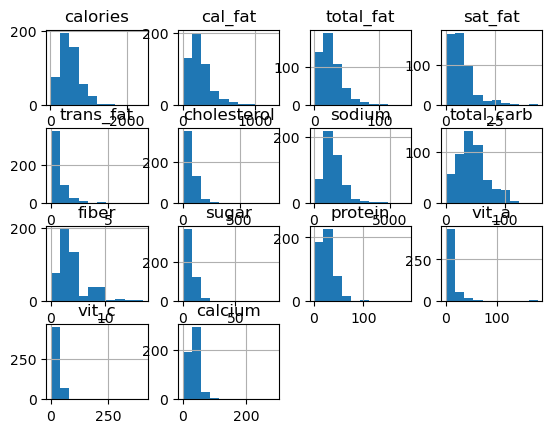

In [16]:
import scipy.stats as stats

# create histogram
plt.subplots_adjust(wspace=2, hspace=4, top=4)
num_col.hist()
plt.show()

In [17]:
# To see skewness
skewness = num_col.skew()
print(f'Skewness kolom nama_kolom: {skewness}')

Skewness kolom nama_kolom: calories       1.413981
cal_fat        1.781757
total_fat      1.792080
sat_fat        2.030152
trans_fat      3.008333
cholesterol    4.419893
sodium         1.805695
total_carb     0.804661
fiber          1.421783
sugar          4.610974
protein        2.815855
vit_a          5.567094
vit_c          9.352112
calcium        5.200444
dtype: float64


Based on the skewness analysis results, it was found that all numerical data had a highly skewed distribution (positive skew), i.e., greater than 0.5.

In [18]:
def plot_catplot(dff, x, kind='count'):
    plt.figure(figsize=(20,5))
    sns.catplot(x=x, data=dff, kind=kind)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Data Model Catplot


<Figure size 2000x500 with 0 Axes>

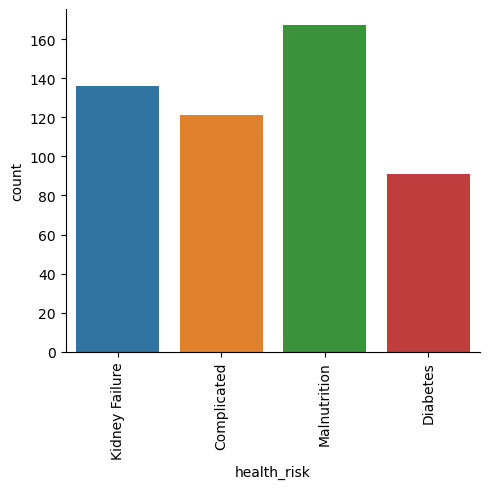

<Figure size 2000x500 with 0 Axes>

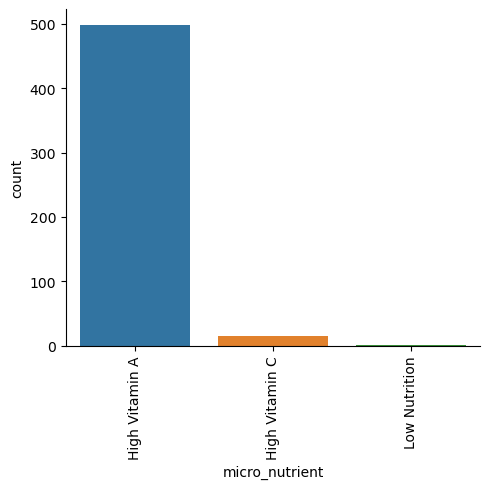

<Figure size 2000x500 with 0 Axes>

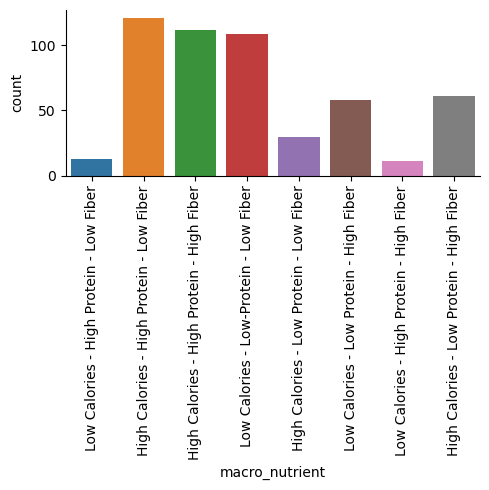

In [19]:
print('Data Model Catplot')
plot_catplot(dff, 'health_risk', kind='count')
plot_catplot(dff, 'micro_nutrient', kind='count')
plot_catplot(dff, 'macro_nutrient', kind='count')

Since ‘micro nutrients’ and ‘macro nutrients’ have unbalanced data conditions, both variables will be removed from the dataset to reduce the impact of data imbalance, such as undersampling or oversampling.

# Handling Text

In [20]:
import nltk
import string

nltk.download('punkt')  # Download the data required by NLTK

def pre_text_processing(text):
    # clean data
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    
    # Tokenization
    token = nltk.word_tokenize(text)
    
    return " ".join(token)

# apply 
dff['clean_text'] = dff['item'].apply(pre_text_processing)

for item in dff['clean_text'].head():  # Print the first few cleaned texts
    print(item)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


artisan grilled chicken sandwich
single bacon smokehouse burger
double bacon smokehouse burger
grilled bacon smokehouse chicken sandwich
crispy bacon smokehouse chicken sandwich


# Scaling & Encoding

In [21]:
nc = dff.select_dtypes(include='number').drop(columns='Unnamed: 0')
nc.columns

Index(['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat',
       'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein',
       'vit_a', 'vit_c', 'calcium'],
      dtype='object')

In [22]:
dfm = nc.merge(dff[['clean_text', 'health_risk']], left_index= True, right_index=True, how='left')

In [23]:
from sklearn.model_selection import train_test_split
X = dfm.drop(columns='health_risk')
y = dfm['health_risk']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer


# Encoding fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Scaling pada fitur
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [26]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat',
       'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein',
       'vit_a', 'vit_c', 'calcium'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['clean_text'], dtype='object'))])

In [27]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

# Full Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('model', model)
                   ])

In [28]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat',
       'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein',
       'vit_a', 'vit_c', 'calcium'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['clean_text'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=300, random_state=42))])

In [29]:
# Training Model
clf.fit(X_train, y_train)

# Model Evaluation
y_pred = clf.predict(X_val)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

# Model Evaluation
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Accuracy: 0.9805825242718447
                precision    recall  f1-score   support

   Complicated       0.96      0.96      0.96        26
      Diabetes       1.00      1.00      1.00        21
Kidney Failure       0.96      0.96      0.96        28
  Malnutrition       1.00      1.00      1.00        28

      accuracy                           0.98       103
     macro avg       0.98      0.98      0.98       103
  weighted avg       0.98      0.98      0.98       103



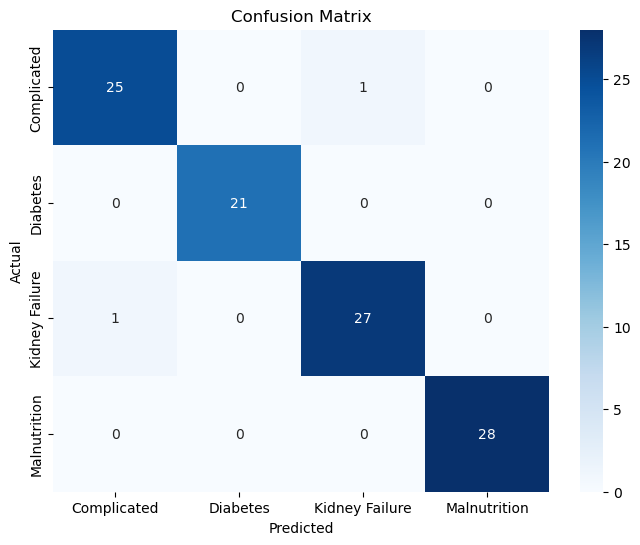

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score

# Stratified K-Fold 5-fold secara default di cross_val_score untuk klasifikasi
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validated accuracies:", scores)
print("Mean accuracy:", scores.mean())
print("Std dev:", scores.std())

Cross-validated accuracies: [0.95145631 0.96116505 0.96116505 0.99029126 0.98058252]
Mean accuracy: 0.9689320388349515
Std dev: 0.01426887228805734


In [33]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    clf, X, y,
    cv=5,
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
    n_jobs=-1,
    return_train_score=True
)

print("Mean precision (weighted):", cv_results['test_precision_weighted'].mean())
print("Mean recall (weighted):", cv_results['test_recall_weighted'].mean())
print("Mean F1 (weighted):", cv_results['test_f1_weighted'].mean())

Mean precision (weighted): 0.9699457817813043
Mean recall (weighted): 0.9689320388349515
Mean F1 (weighted): 0.9689389901078714


In [34]:
import pickle  # To save and load the model

# Save the trained model
with open('Classification model to predict health risk by food.pkl', 'wb') as file:
    pickle.dump(clf, file)